# IE 360 Assignment#1
Murat ÖZTÜRK  
2019402093

## Question  
How does exchange rates affect the food & tobacco prices and the searching trend of the word 'zam' in Turkey?  

## The source for the data:
1- https://evds2.tcmb.gov.tr/index.php?/evds/serieMarket  
a) (USD) ABD Doları (Döviz Alış) - Düzey  
b) 011.GIDA - Düzey  
c) 022.TÜTÜN - Düzey  
Monthly, from '10-2009' to '04-2022'   

2- https://trends.google.com/trends/explore?date=all&geo=TR&q=zam

## 1- Reading and examining the data    
**Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

**Read trend data**

In [2]:
df_trnd = pd.read_csv('multiTimeline.csv', dtype={'zam:(Türkiye)':'int32'}, header=1, names=['Tarih', 'Zam'], parse_dates=True, index_col=0)
df_trnd.head()

,Zam
Tarih,
2004-01-01,4
2004-02-01,2
2004-03-01,6
2004-04-01,5
2004-05-01,4


<AxesSubplot:xlabel='Tarih'>

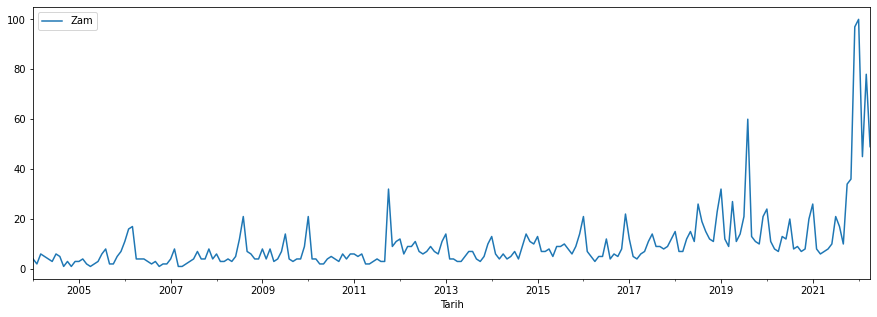

In [3]:
df_trnd.plot(figsize=(15,5))

Since we do not have as much time interval for the other datas', cropping some of this data is necessary.

In [4]:
time_intv = ['2009.10.01', '2022.03.01']

In [5]:
mask = (df_trnd.index >= pd.to_datetime(time_intv[0])) & (df_trnd.index <= pd.to_datetime(time_intv[1]))

<AxesSubplot:xlabel='Tarih'>

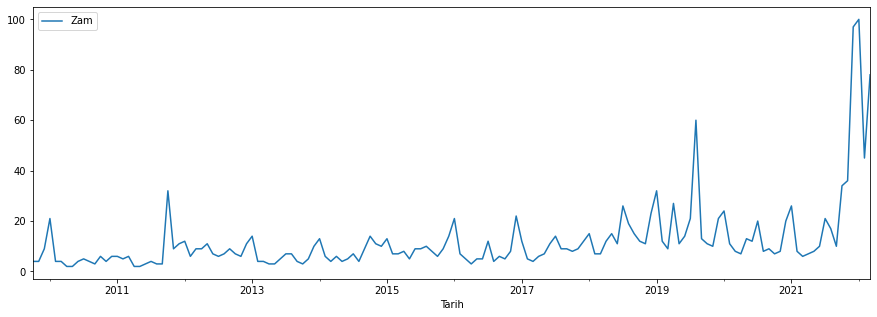

In [6]:
df_trnd_masked = df_trnd.iloc[mask,:]
df_trnd_masked.plot(figsize=(15,5))

**Read bank data**

In [7]:
df_evds = pd.read_excel('EVDS.xlsx', index_col=0, names=['Dolar-TL', 'Gıda', 'Tütün'])
df_evds.dropna(inplace=True)
df_evds.index = pd.to_datetime(df_evds.index)
df_evds.loc[:,['Dolar-TL', 'Gıda']] = pd.DataFrame(df_evds.loc[:,['Dolar-TL', 'Gıda']], dtype='float')
df_evds.iloc[[0,1,2,3,4,-4,-3,-2,-1],:]   #first four and last four

,Dolar-TL,Gıda,Tütün
2009-10-01,1.462138,169.54,234.35
2009-11-01,1.480021,173.52,234.35
2009-12-01,1.499513,177.59,234.35
2010-01-01,1.466320,180.56,287.24
2010-02-01,1.505560,190.24,298.32
2021-12-01,13.528496,894.57,1030.44
2022-01-01,13.519262,993.94,1247.78
2022-02-01,13.621125,1078.58,1247.78
2022-03-01,14.565609,1130.68,1300.55


<AxesSubplot:>

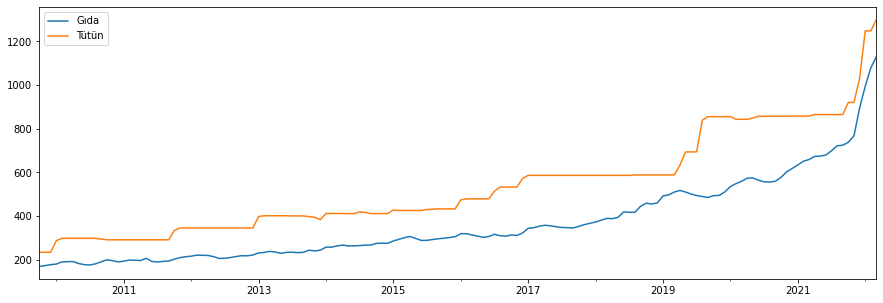

In [8]:
df_evds.plot(y=['Gıda', 'Tütün'], figsize=(15,5))

<AxesSubplot:>

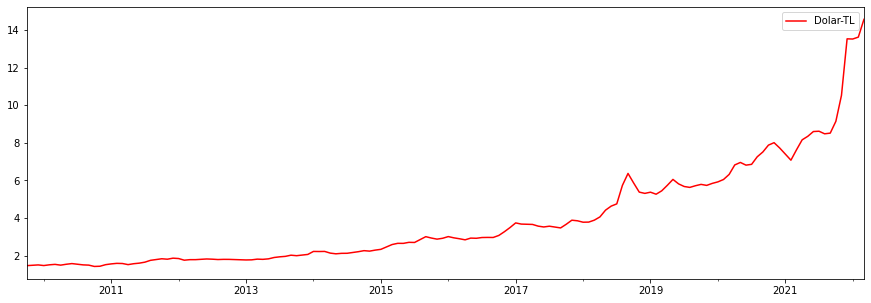

In [9]:
df_evds.plot(y=['Dolar-TL'], color='red', figsize=(15,5))

There seems to be an upward trend for 'Dolar-TL', 'Gıda' & 'Tütün'

**Merge all the data**

In [10]:
df = pd.merge(df_evds, df_trnd_masked, left_index=True, right_index=True)
df.head()

,Dolar-TL,Gıda,Tütün,Zam
2009-10-01,1.462138,169.54,234.35,4
2009-11-01,1.480021,173.52,234.35,4
2009-12-01,1.499513,177.59,234.35,9
2010-01-01,1.466320,180.56,287.24,21
2010-02-01,1.505560,190.24,298.32,4


## 2- Autocorrelation Analysis

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

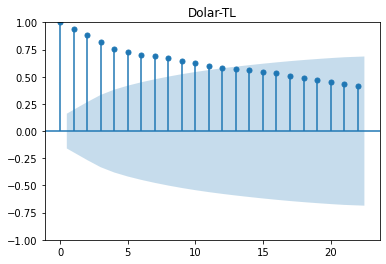

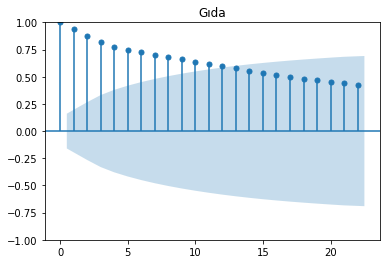

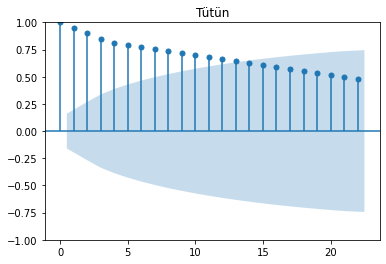

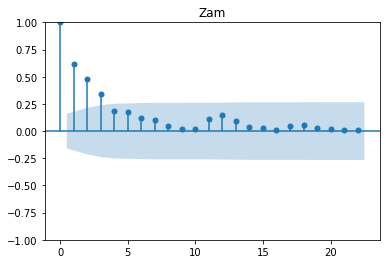

In [12]:
plot_acf(df['Dolar-TL'], title='Dolar-TL')
plot_acf(df['Gıda'], title='Gıda')
plot_acf(df['Tütün'], title='Tütün')
plot_acf(df['Zam'], title='Zam')
None

There is obviously an autocorrelation for exchange rate, food & tobacco.

## 3- Correlation Analysis

<AxesSubplot:>

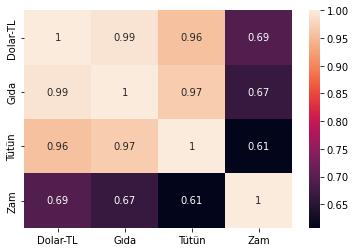

In [13]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

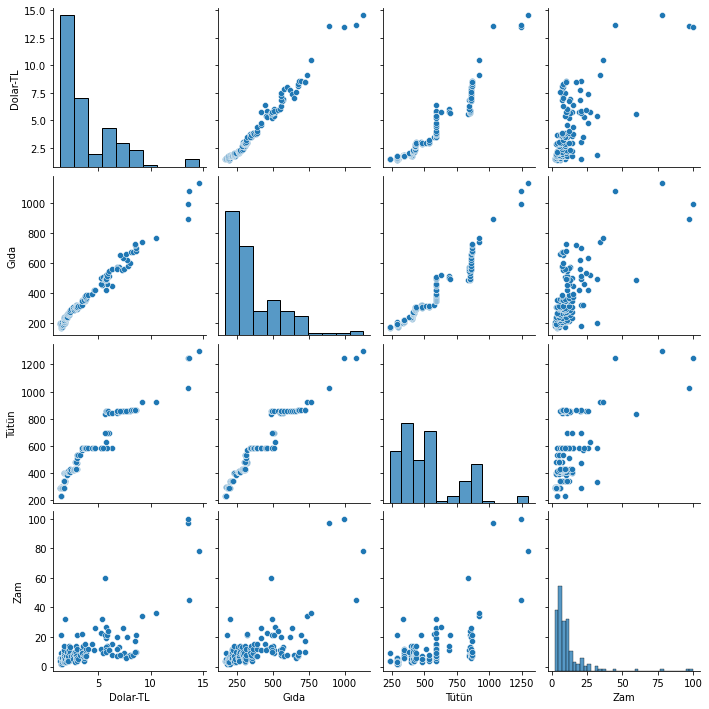

In [14]:
sns.pairplot(df)

### Gıda vs exchange rate

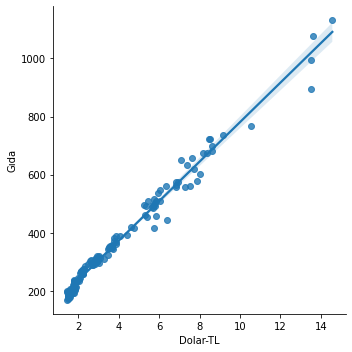

In [15]:
sns.lmplot(x="Dolar-TL", y="Gıda", data=df)

Exchange rate and price index of 'Gıda' are highly correlated.

### Tütün vs exchange rate

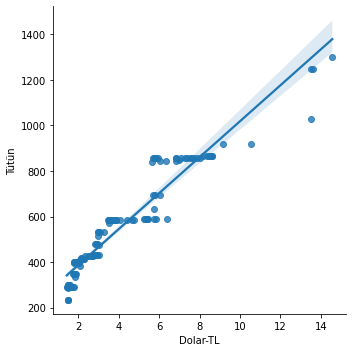

In [16]:
sns.lmplot(x="Dolar-TL", y="Tütün", data=df)

Exchange rate and price index of 'Tütün' are highly correlated. However, there seems to be a lag for the increase in the price of the 'Tütün'. The price of the 'Tütün' seems to be more non-elastic than the price index of 'Gıda'.

### Zam vs exchange rate

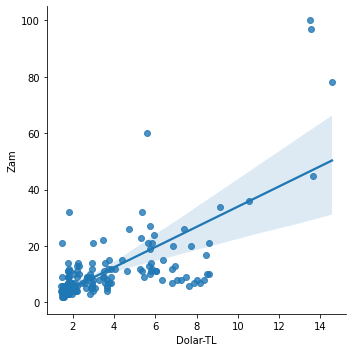

In [17]:
sns.lmplot(x="Dolar-TL", y="Zam", data=df)

In [18]:
df[['Dolar-TL','Zam']].corr()

,Dolar-TL,Zam
Dolar-TL,1.00000,0.69142
Zam,0.69142,1.00000


There appears to be a correlation between these two.  
However, intuitively, for 'Zam' and exchange rates, the correlation isn't best explained with the values itself.  
xr: exchange rate  
For example: lets say the the xr increases but then stops and stays at a level, first there will be an increase on the search trend of 'Zam'. However, after xr becomes stable, the 'Zam' trend will decrease and stay near zero.  

By the definition of the word 'Zam', the change of the xr explains the trend 'Zam' better.  

### Change on exchange rate vs Zam
d/dt(xr) = 'Zam'  
Same as:  
xr = cumsum(zam)  

In [19]:
df_zam_xr = pd.DataFrame({'Dolar-TL':df['Dolar-TL']}).merge(pd.DataFrame({'Zam_cumsum':(df['Zam']).cumsum()}), left_index=True, right_index=True)
df_zam_xr.head()

,Dolar-TL,Zam_cumsum
2009-10-01,1.462138,4
2009-11-01,1.480021,8
2009-12-01,1.499513,17
2010-01-01,1.466320,38
2010-02-01,1.505560,42


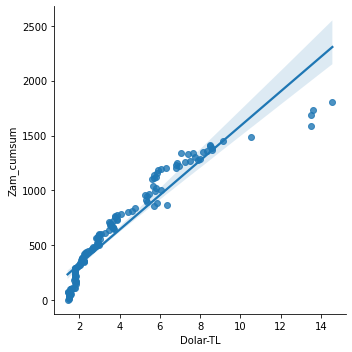

In [20]:
sns.lmplot(x="Dolar-TL", y="Zam_cumsum", data=df_zam_xr)

In [21]:
df_zam_xr.corr()

,Dolar-TL,Zam_cumsum
Dolar-TL,1.000000,0.948931
Zam_cumsum,0.948931,1.000000


The correlation is much better now, but we can still do better.  

### Percentage change on exchange rate vs Zam
The change of the exchange rate affects zam, however, percentage change is more important than the raw change, since a raise of 1 TL is more significant when the original price is 1TL rather than for example 100 TL.  
New model:  
d/dt(xr) / xr = 'Zam'  
Same as:  
ln(exch rate) = cumsum(zam)  

In [22]:
df_zam_xr_opt = pd.DataFrame({'Dolar-TL_ln':np.log(df['Dolar-TL'])}).merge(pd.DataFrame({'Zam_cumsum':(df['Zam']).cumsum()}), left_index=True, right_index=True)
df_zam_xr_opt.head()

,Dolar-TL_ln,Zam_cumsum
2009-10-01,0.379900,4
2009-11-01,0.392056,8
2009-12-01,0.405140,17
2010-01-01,0.382756,38
2010-02-01,0.409165,42


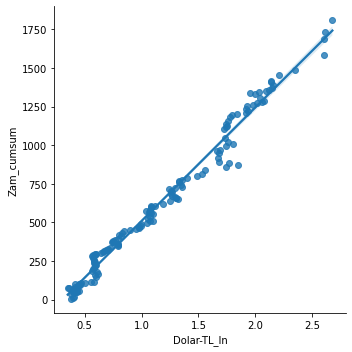

In [23]:
sns.lmplot(x="Dolar-TL_ln", y="Zam_cumsum", data=df_zam_xr_opt)

In [24]:
df_zam_xr_opt.corr()

,Dolar-TL_ln,Zam_cumsum
Dolar-TL_ln,1.000000,0.991614
Zam_cumsum,0.991614,1.000000


The correlation is much better now.  
Since we are using the natural logarithm of exchange rate, we have to transform others in the same way as well in order to preserve the correlation between exchange rate and them.

In [25]:
df_opt = df_zam_xr_opt.merge(np.log(df[['Gıda', 'Tütün']]), left_index=True, right_index=True)
cols = df_opt.columns.tolist()
df_opt = df_opt[cols[:1]+cols[2:]+cols[1:2]]
df_opt.rename(columns={'Gıda':'Gıda_ln', 'Tütün':'Tütün_ln'}, inplace=True)
df_opt.head()

,Dolar-TL_ln,Gıda_ln,Tütün_ln,Zam_cumsum
2009-10-01,0.379900,5.133089,5.456816,4
2009-11-01,0.392056,5.156293,5.456816,8
2009-12-01,0.405140,5.179478,5.456816,17
2010-01-01,0.382756,5.196063,5.660318,38
2010-02-01,0.409165,5.248286,5.698167,42


<AxesSubplot:>

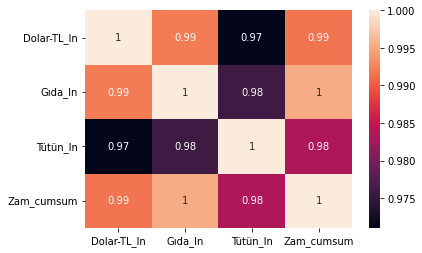

In [26]:
corrMatrix_opt = df_opt.corr()
sns.heatmap(corrMatrix_opt, annot=True)

Now the correlation between 'Zam' trend is much stronger with other data.

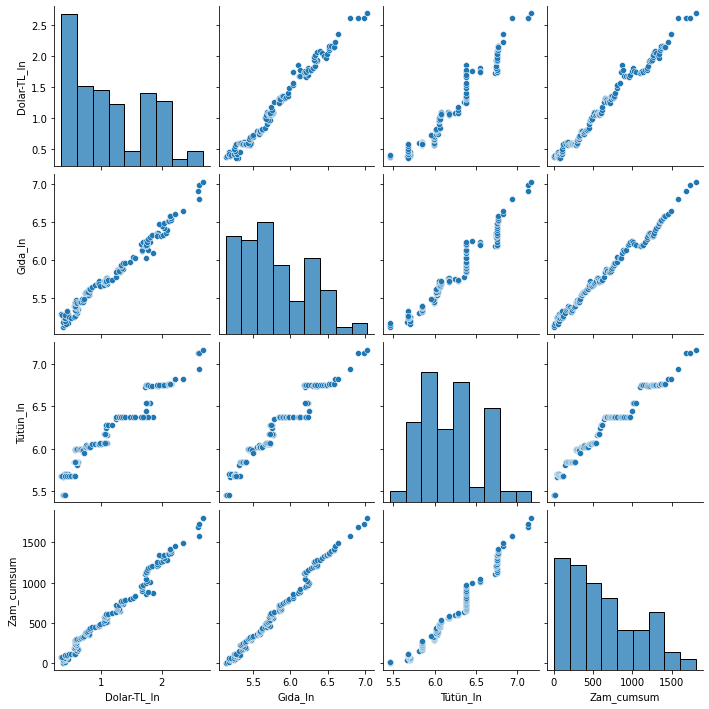

In [27]:
sns.pairplot(df_opt)

## 4- Final Words

After analyzing the data, it can be seen that there is a very strong correlation between the exchange rate, food price and tobacco price.  
Also, the amount of the word 'Zam' being searched in Turkey heavily depends on the change on these values.  
From the data, it can not be said whether exhange rate is the cause of the change on the other data's, or it is another effect of some unknown cause.  
However, we can say that an increase in exchange rate will likely cause an increase in the food & tobacco prices, then also people will google the word 'Zam' as another effect.